# Machine Learning Experiment 3

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

## Preprocess

Load data and the evaluation function.

In [2]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

data = pd.DataFrame(wine.data, columns=wine.feature_names)


Peek inside the data.

In [3]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
def evaluate_model(decision_tree_classifier):
    """
    Using EXISTING training and testing sets.

    Print Classification Report for Testing set and Training set.
    Plot figure of Feature Importance and the specified tree.
    :param decision_tree_classifier: TRAINED DecisionTreeClassifier
    """
    #get Accuracy and Confusion Matrix
    print('Train Classification Report: ')
    print(classification_report(y_train.reshape(-1,1),
                                decision_tree_classifier.predict(X_train).reshape(-1,1),
                                target_names=wine.target_names))
    print('Train Confusion Matrix:')
    print(confusion_matrix(y_train.reshape(-1,1),
                           decision_tree_classifier.predict(X_train).reshape(-1,1)))
    print('-'*50)
    print('Test Classification Report: ')
    print(classification_report(y_test.reshape(-1,1),
                                decision_tree_classifier.predict(X_test).reshape(-1,1),
                                target_names=wine.target_names))
    print('Test Confusion Matrix:')
    print(confusion_matrix(y_test.reshape(-1,1),
                           decision_tree_classifier.predict(X_test).reshape(-1,1)))

    #get Feature Importance
    plt.barh(wine.feature_names, decision_tree_classifier.feature_importances_)
    plt.title('Feature Importance')
    plt.show()

    #get Tree Figure
    plt.figure(figsize=(25,20))
    plot_tree(decision_tree_classifier,
              feature_names=wine.feature_names,
              class_names=wine.target_names,
              filled=True)

## Show the Original Decision Tree

Train Classification Report: 
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        40
     class_1       1.00      1.00      1.00        50
     class_2       1.00      1.00      1.00        34

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Train Confusion Matrix:
[[40  0  0]
 [ 0 50  0]
 [ 0  0 34]]
--------------------------------------------------
Test Classification Report: 
              precision    recall  f1-score   support

     class_0       0.82      0.95      0.88        19
     class_1       0.89      0.81      0.85        21
     class_2       0.85      0.79      0.81        14

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54

Test Confusion Matrix:
[[18  1  0]
 [ 2 17  2]
 [ 2  1 11]]


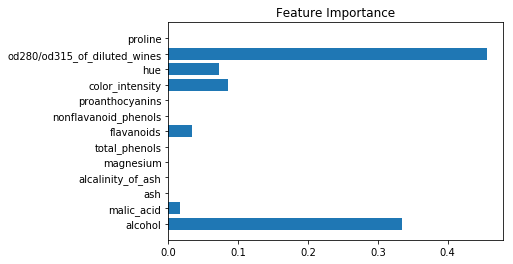

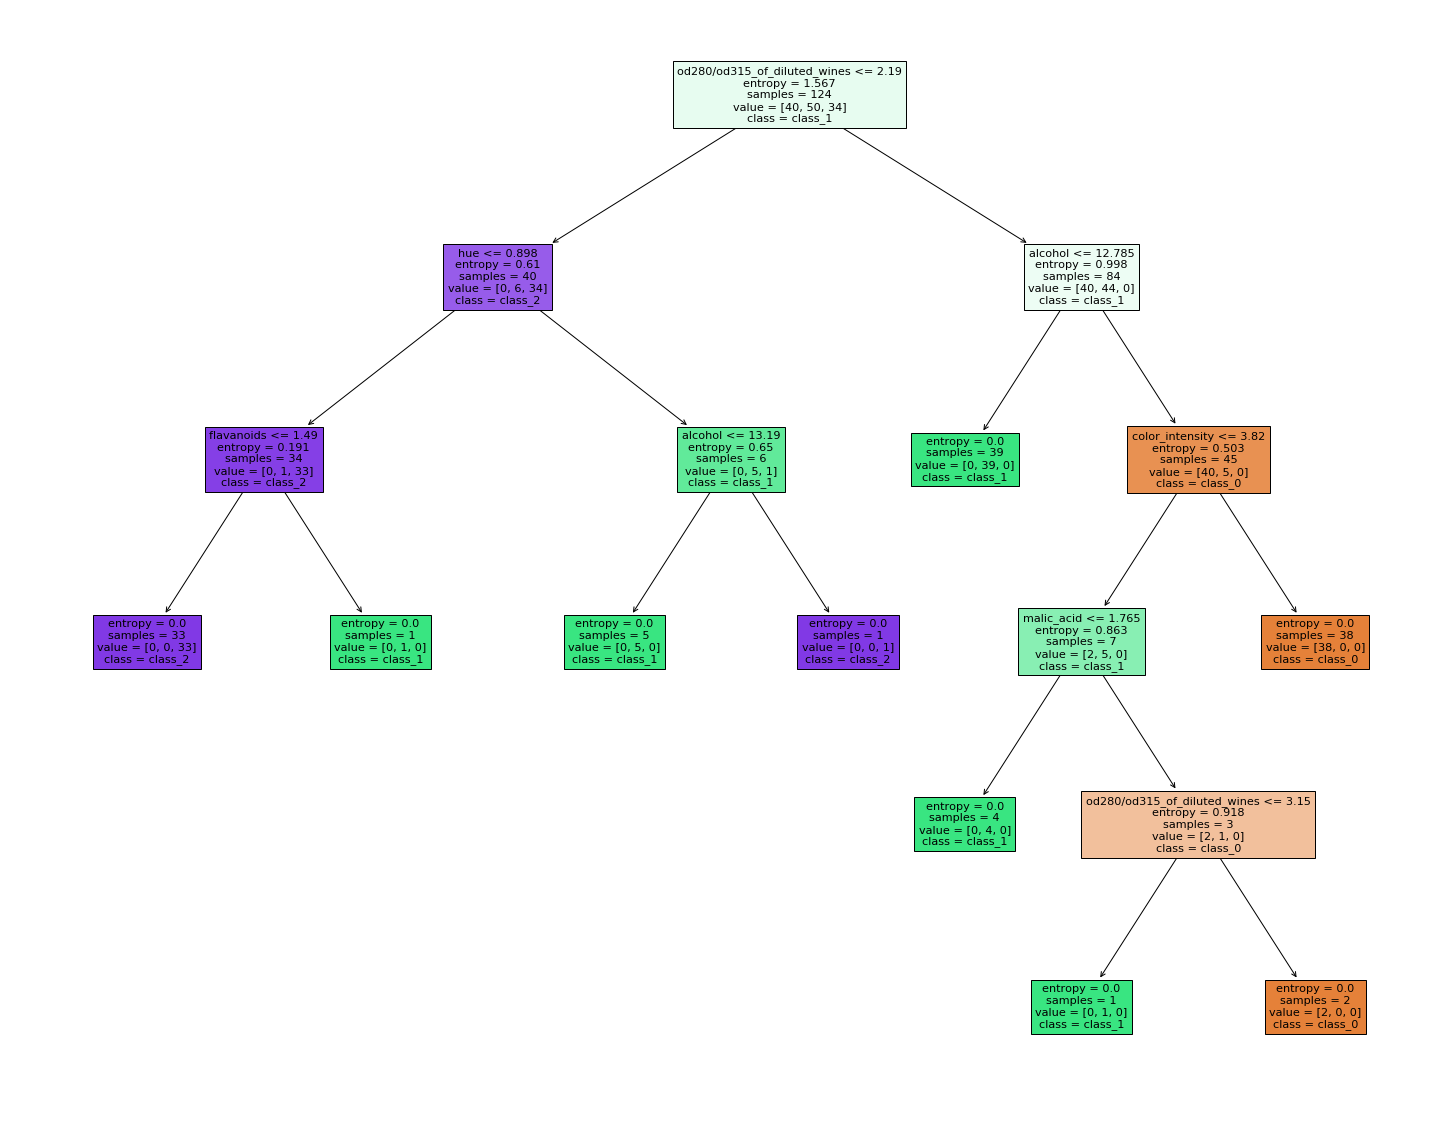

In [6]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

evaluate_model(clf)

## Minimal Cost-Complexity Pruning

Compute the path.

In [7]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Since the last tree has only one node, we can just remove it.

In [8]:
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

In [9]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print('There is', len(clfs), 'trees overall.')

There is 8 trees overall.


Plot some graphs.

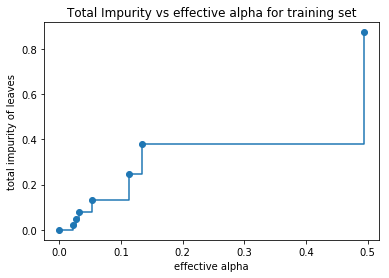

In [10]:
_, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

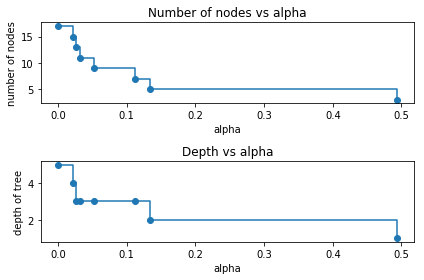

In [11]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

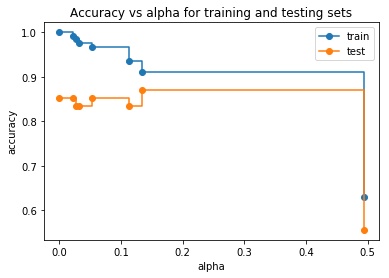

In [12]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Train Classification Report: 
              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        40
     class_1       0.94      0.98      0.96        50
     class_2       0.97      0.97      0.97        34

    accuracy                           0.97       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124

Train Confusion Matrix:
[[38  2  0]
 [ 0 49  1]
 [ 0  1 33]]
--------------------------------------------------
Test Classification Report: 
              precision    recall  f1-score   support

     class_0       0.81      0.89      0.85        19
     class_1       0.86      0.86      0.86        21
     class_2       0.92      0.79      0.85        14

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54

Test Confusion Matrix:
[[17  2  0]
 [ 2 18  1]
 [ 2  1 11]]


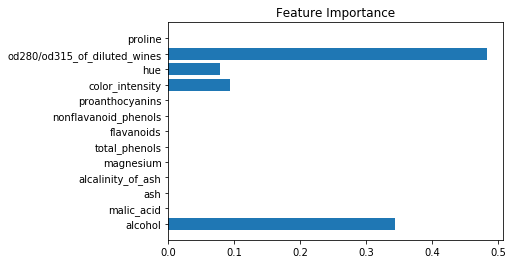

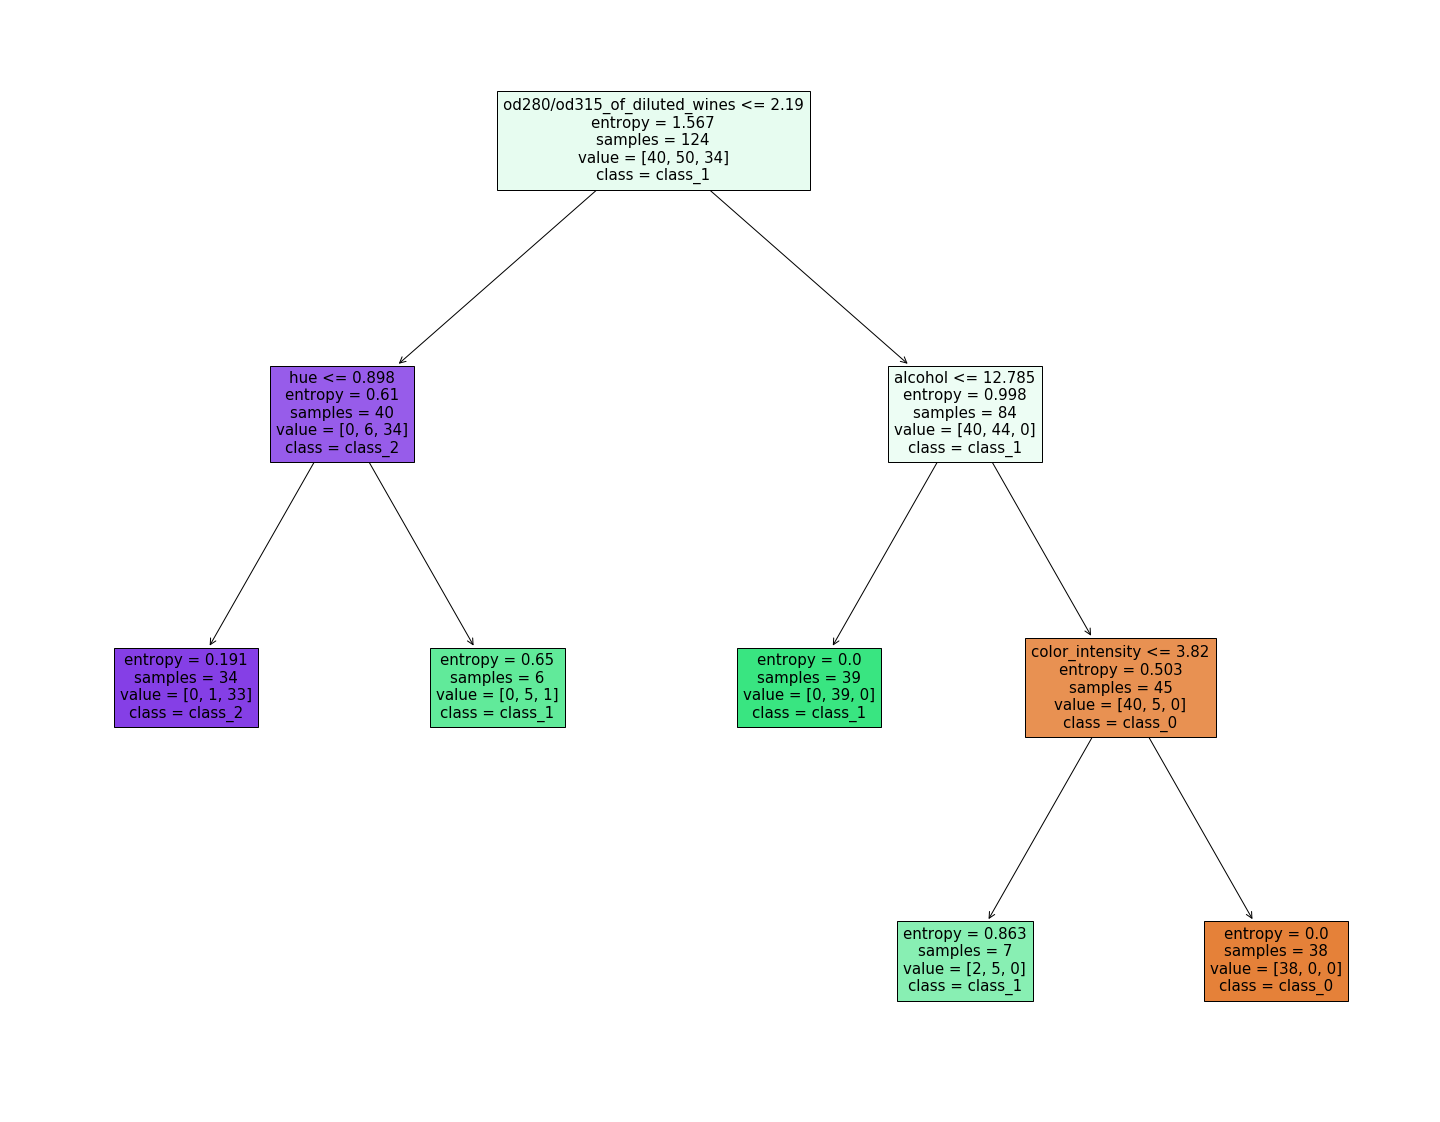

In [13]:
evaluate_model(clfs[4])